In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [75]:
df=pd.read_csv('my_movies.csv')

In [76]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [77]:
df.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [78]:
df['V1'].value_counts()

Gladiator        6
Sixth Sense      2
Harry Potter1    1
LOTR1            1
Name: V1, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [80]:
df['V3']=df['V3'].astype('category')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   V1             10 non-null     object  
 1   V2             10 non-null     object  
 2   V3             7 non-null      category
 3   V4             2 non-null      object  
 4   V5             1 non-null      object  
 5   Sixth Sense    10 non-null     int64   
 6   Gladiator      10 non-null     int64   
 7   LOTR1          10 non-null     int64   
 8   Harry Potter1  10 non-null     int64   
 9   Patriot        10 non-null     int64   
 10  LOTR2          10 non-null     int64   
 11  Harry Potter2  10 non-null     int64   
 12  LOTR           10 non-null     int64   
 13  Braveheart     10 non-null     int64   
 14  Green Mile     10 non-null     int64   
dtypes: category(1), int64(10), object(4)
memory usage: 1.4+ KB


In [82]:
df['V1']=df['V1'].astype('category')

In [83]:
df['V2']=df['V2'].astype('category')

In [84]:
df['V4']=df['V4'].astype('category')

In [85]:
df['V5']=df['V5'].astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   V1             10 non-null     category
 1   V2             10 non-null     category
 2   V3             7 non-null      category
 3   V4             2 non-null      category
 4   V5             1 non-null      category
 5   Sixth Sense    10 non-null     int64   
 6   Gladiator      10 non-null     int64   
 7   LOTR1          10 non-null     int64   
 8   Harry Potter1  10 non-null     int64   
 9   Patriot        10 non-null     int64   
 10  LOTR2          10 non-null     int64   
 11  Harry Potter2  10 non-null     int64   
 12  LOTR           10 non-null     int64   
 13  Braveheart     10 non-null     int64   
 14  Green Mile     10 non-null     int64   
dtypes: category(5), int64(10)
memory usage: 1.8 KB


In [87]:
columns=['V5','V4']
df=df.drop(columns,axis=1)

In [88]:
for column in ['V3']:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [89]:
df

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,Sixth Sense,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,Sixth Sense,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,Sixth Sense,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,1,1,0,0,0,0,0,1,0,1


In [90]:
data=pd.get_dummies(df)
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense
0,1,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,1,1,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0


In [91]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
68,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Glad..."
69,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Glad..."
70,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Patr..."
71,0.5,"(V3_Sixth Sense, V2_Patriot, Gladiator, Patrio..."


In [92]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
83,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
85,(Green Mile),"(V1_Sixth Sense, Sixth Sense)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
80,"(V1_Sixth Sense, Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
22,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
38,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
20,(V3_Sixth Sense),(Gladiator),0.7,0.7,0.5,0.714286,1.020408,0.01,1.050000
21,(Gladiator),(V3_Sixth Sense),0.7,0.7,0.5,0.714286,1.020408,0.01,1.050000
12,(V3_Sixth Sense),(Sixth Sense),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333


In [93]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
611,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, Gladiator, Patriot, ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
612,(V2_Patriot),"(Sixth Sense, V3_Sixth Sense, Gladiator, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
613,(Gladiator),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
614,(Patriot),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

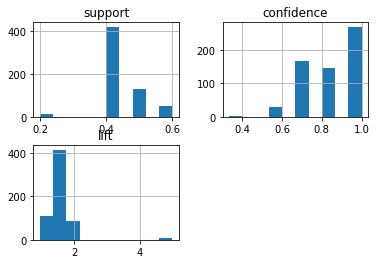

In [95]:
rules[['support','confidence','lift']].hist()

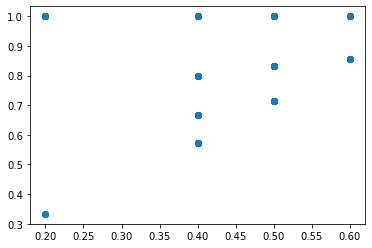

In [96]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


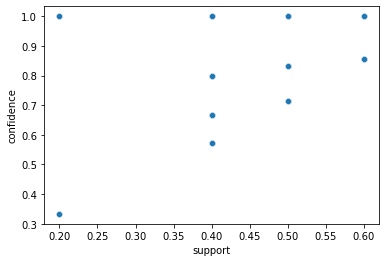

In [97]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules)

plt.show()